## Trip Advisor - Hotel Reviews

In [ ]:
# Unzip files
import zipfile
import glob

# Check for pre-existing zip files
files = glob.glob('*.zip')
files

['trip-advisor-hotel-reviews.zip']

In [ ]:
print("Unzipping....")

with zipfile.ZipFile("trip-advisor-hotel-reviews.zip","r") as zip_ref:
    zip_ref.extractall("trip_advisor_reviews")

Unzipping....


In [ ]:
# Load libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load data

df = pd.read_csv("/content/drive/MyDrive/tripadvisor_hotel_reviews.csv")
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
len(df)

20491

In [ ]:
# Transform documents into counts

cv = CountVectorizer(max_df=0.95,min_df=2,stop_words="english")
# Fit on documents
dtm = cv.fit_transform(df['Review'])
dtm

<20491x25268 sparse matrix of type '<class 'numpy.int64'>'
	with 1627879 stored elements in Compressed Sparse Row format>

### Topic Modeling - Latent Dirichlet Allocation (LDA)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# Instantiate model
lda = LatentDirichletAllocation(n_components=10,random_state=42)
lda.fit(dtm)

LatentDirichletAllocation(random_state=42)

In [ ]:
# Stored words
len(cv.get_feature_names_out())

25268

In [ ]:
# Display random words
import random
for i in range(10):
    random_word_id = random.randint(0,25267)
    print(cv.get_feature_names_out()[random_word_id])

filled
large
plot
comte
wallpapers
helium
onion
partying
mor
1x


In [ ]:
# Top words per topic

len(lda.components_)

10

In [ ]:
lda.components_

array([[1.57438528e+02, 1.00008803e-01, 1.00000480e-01, ...,
        1.00000000e-01, 1.00000000e-01, 1.00078524e-01],
       [1.52580043e+02, 4.03442376e-01, 1.00000000e-01, ...,
        3.17762258e+00, 1.00001115e-01, 1.00000000e-01],
       [1.31056579e+02, 1.47937477e+01, 1.00000000e-01, ...,
        1.00040951e-01, 1.00000000e-01, 1.00000000e-01],
       ...,
       [4.15422295e+01, 7.67846375e+01, 3.09999120e+00, ...,
        3.02208749e+00, 4.09997871e+00, 1.00072185e-01],
       [8.01081298e-01, 3.32956908e-01, 1.00000000e-01, ...,
        1.00000002e-01, 1.00000000e-01, 1.00000001e-01],
       [6.70090972e+02, 1.95968932e+01, 1.00008324e-01, ...,
        1.00000000e-01, 1.00000000e-01, 1.00000000e-01]])

In [ ]:
len(lda.components_[0])

25268

In [ ]:
single_topic = lda.components_[0]

# return indices that would sort this array
single_topic.argsort()

array([ 2165, 19436, 21441, ..., 11302,  2797, 17163])

In [ ]:
# Word least representative of this topic
single_topic[2165]

0.10000000000274827

In [ ]:
# Word most representative of this topic
single_topic[17163]

2198.541206950646

In [ ]:
# Top 10 words for this topic
top_10_words_indices = single_topic.argsort()[-10:]
top_10_words_indices

array([10192, 12520, 19548, 19239,  1949, 10368, 15242, 11302,  2797,
       17163])

In [ ]:
for index in top_10_words_indices:
    print(cv.get_feature_names_out()[index])

good
juan
san
room
area
great
nice
hotel
beach
pool


In [ ]:
# Top 10 topics

for index,topic in enumerate(lda.components_):
    print(f'The Top 15 words for this topic #{index}')
    print([cv.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    print('\n')

The Top 15 words for this topic #0
['stay', 'old', 'restaurants', 'did', 'food', 'good', 'juan', 'san', 'room', 'area', 'great', 'nice', 'hotel', 'beach', 'pool']


The Top 15 words for this topic #1
['breakfast', 'just', 'location', 'floor', 'stay', 'small', 'night', 'rooms', 'bed', 'nice', 'bathroom', 'good', 'did', 'hotel', 'room']


The Top 15 words for this topic #2
['parking', 'manager', 'just', 'experience', 'stayed', 'like', 'did', 'rooms', 'desk', 'hotels', 'staff', 'stay', 'room', 'service', 'hotel']


The Top 15 words for this topic #3
['wonderful', 'nice', 'night', 'time', 'floor', 'new', 'location', 'view', 'stayed', 'service', 'staff', 'stay', 'great', 'room', 'hotel']


The Top 15 words for this topic #4
['really', 'like', 'day', 'room', 'staff', 'pool', 'people', 'time', 'just', 'did', 'good', 'great', 'food', 'resort', 'beach']


The Top 15 words for this topic #5
['good', 'just', 'san', 'staff', 'desk', 'like', 'stayed', 'bad', 'inn', 'rooms', 'night', 'stay', 'hotel'

In [ ]:
# Attaching discovered topic labels to original articles

In [ ]:
dtm.shape

(20491, 25268)

In [ ]:
topic_results = lda.transform(dtm)
topic_results.shape

(20491, 10)

In [ ]:
topic_results[0]

array([0.00114974, 0.82467816, 0.10100681, 0.06626727, 0.00114966,
       0.00114975, 0.00114974, 0.00114966, 0.00114956, 0.00114964])

In [ ]:
topic_results[0].argmax()

1

This means that our model thinks that the first article belongs to topic #1.

In [ ]:
# Combining with original data

topic = topic_results.argmax(axis=1)
topic

array([1, 2, 1, ..., 1, 2, 5])

In [ ]:
df_copy = df.copy()
df_copy['Topic'] = topic
df_copy.head(15)

,Review,Rating,Topic
0,nice hotel expensive parking got good deal sta...,4,1
1,ok nothing special charge diamond member hilto...,2,2
2,nice rooms not 4* experience hotel monaco seat...,3,1
3,"unique, great stay, wonderful time hotel monac...",5,2
4,"great stay great stay, went seahawk game aweso...",5,9
5,love monaco staff husband stayed hotel crazy w...,5,1
6,"cozy stay rainy city, husband spent 7 nights m...",5,1
7,"excellent staff, housekeeping quality hotel ch...",4,2
8,"hotel stayed hotel monaco cruise, rooms genero...",5,1
9,excellent stayed hotel monaco past w/e delight...,5,6


### Topic Modeling - NMF (Non-Negative Matrix Factorization)

In [ ]:
# Transform documents into Tfidf matrix

tfidf = TfidfVectorizer(max_df=0.95,min_df=2,stop_words="english")
# Fit on documents
dtm = tfidf.fit_transform(df['Review'])
dtm

<20491x25268 sparse matrix of type '<class 'numpy.float64'>'
	with 1627879 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.decomposition import NMF

# Instantiate model
nmf = NMF(n_components=10,init="nndsvda",max_iter=500,random_state=42)
nmf.fit(dtm)

NMF(init='nndsvda', max_iter=500, n_components=10, random_state=42)

In [ ]:
# Stored words
len(tfidf.get_feature_names_out())

25268

In [ ]:
# Display random words
import random
for i in range(10):
    random_word_id = random.randint(0,25267)
    print(cv.get_feature_names_out()[random_word_id])

wide
inlcuded
sprawl
splitting
promise
syrup
coordinator
epicurean
jaun
hideaway


In [ ]:
# Top words per topic

len(nmf.components_)

10

In [ ]:
nmf.components_

array([[0.        , 0.00155971, 0.        , ..., 0.        , 0.00201587,
        0.        ],
       [0.11239349, 0.01084121, 0.00019403, ..., 0.0005162 , 0.        ,
        0.00113263],
       [0.11554369, 0.00196953, 0.        , ..., 0.00042536, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01096506, 0.00030444, ..., 0.00315358, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.0009545 ,
        0.        ]])

In [ ]:
single_topic = nmf.components_[0]

# return indices that would sort this array
single_topic.argsort()

array([    0, 15574, 15572, ..., 18289, 19258, 11302])

In [ ]:
# Top 10 words for this topic
top_10_words_indices = single_topic.argsort()[-10:]
top_10_words_indices

array([18982, 21426, 11316, 13413, 21364,  3374, 21423, 18289, 19258,
       11302])

In [ ]:
for index in top_10_words_indices:
    print(tfidf.get_feature_names_out()[index])

reviews
staying
hotels
located
star
booked
stayed
recommend
rooms
hotel


In [ ]:
# Top 10 topics

for index,topic in enumerate(nmf.components_):
    print(f'The Top 15 words for this topic #{index}')
    print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    print('\n')

The Top 15 words for this topic #0
['like', 'website', 'best', 'modern', 'staff', 'reviews', 'staying', 'hotels', 'located', 'star', 'booked', 'stayed', 'recommend', 'rooms', 'hotel']


The Top 15 words for this topic #1
['went', 'punta', 'cana', 'water', 'vacation', 'just', 'day', 'beautiful', 'time', 'people', 'did', 'pool', 'food', 'beach', 'resort']


The Top 15 words for this topic #2
['small', 'booked', 'asked', 'shower', 'day', 'told', 'check', 'got', 'bathroom', 'desk', 'floor', 'night', 'bed', 'did', 'room']


The Top 15 words for this topic #3
['bit', 'pretty', 'choice', 'small', 'friendly', 'staff', 'price', 'excellent', 'money', 'rooms', 'clean', 'breakfast', 'location', 'value', 'good']


The Top 15 words for this topic #4
['view', 'right', 'stayed', 'stay', 'price', 'fantastic', 'clean', 'value', 'time', 'place', 'really', 'rooms', 'staff', 'location', 'great']


The Top 15 words for this topic #5
['cable', 'area', 'downtown', 'seattle', 'street', 'free', 'old', 'stay', '

In [ ]:
# Attaching discovered topic labels to original articles

In [ ]:
topic_results = nmf.transform(dtm)
topic_results.shape

(20491, 10)

In [ ]:
# Combining with original data

topic = topic_results.argmax(axis=1)
topic

array([7, 2, 2, ..., 2, 2, 2])

In [ ]:
df_copy['Topic_NMF'] = topic
df_copy.head(15)

,Review,Rating,Topic,Topic_NMF
0,nice hotel expensive parking got good deal sta...,4,1,7
1,ok nothing special charge diamond member hilto...,2,2,2
2,nice rooms not 4* experience hotel monaco seat...,3,1,2
3,"unique, great stay, wonderful time hotel monac...",5,2,4
4,"great stay great stay, went seahawk game aweso...",5,9,2
5,love monaco staff husband stayed hotel crazy w...,5,1,2
6,"cozy stay rainy city, husband spent 7 nights m...",5,1,3
7,"excellent staff, housekeeping quality hotel ch...",4,2,6
8,"hotel stayed hotel monaco cruise, rooms genero...",5,1,4
9,excellent stayed hotel monaco past w/e delight...,5,6,9


### Topic Modeling using Gensim

In [ ]:
!pip install pyldavis==2.1.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyldavis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97721 sha256=31aabc8b6bda7bd6c401bc5f88ad2912254af2dd402a8abe28a1448206c48106
  Stored in directory: /root/.cache/pip/wheels/d9/93/d6/16c95da19c32f037fd75135ea152d0df37254c25cd1a8b4b6c
Successfully built pyldavis
  Attempting uninstall: pyldavis
    Found existing installation: pyLDAvis 3.4.1
    Uninstalling pyLDAvis-3.4.1:
      Successfully uninstalled pyLDAvis-3.4.1


In [ ]:
import gensim
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('punkt')
from gensim import corpora
import pyLDAvis
import pyLDAvis.gensim as gensimvis
pyLDAvis.enable_notebook()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Prepare data for topic modeling

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# preprocess reviews

def preprocess_reviews(review):
    review = review.lower()
    tokens = word_tokenize(review)
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [token for token in tokens if len(token) > 2]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Apply preprocessing to reviews

reviews = [preprocess_reviews(review) for review in df['Review']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Create dictionary and corpus for the reviews

dictionary = corpora.Dictionary(reviews)
dictionary.filter_extremes(no_below=2, no_above=1.0)

# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(review) for review in reviews]

print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of unique tokens: 27588
Number of documents: 20491


In [ ]:
# Train an LDA model on the corpus

lda_model = gensim.models.LdaModel(corpus=corpus,id2word=dictionary,num_topics=10)

# Print the topics and the top words for each topic
for topic in lda_model.show_topics(num_topics=10):
    print('Topic:',topic[0])
    print('Top words:',topic[1],'\n')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic: 0
Top words: 0.048*"venice" + 0.034*"florence" + 0.033*"ramblas" + 0.021*"catalunya" + 0.016*"placa" + 0.012*"hotel" + 0.010*"stay" + 0.010*"location" + 0.010*"staff" + 0.009*"room" 

Topic: 1
Top words: 0.020*"airport" + 0.012*"good" + 0.011*"tour" + 0.011*"n't" + 0.009*"room" + 0.008*"hotel" + 0.008*"great" + 0.008*"beach" + 0.008*"resort" + 0.007*"food" 

Topic: 2
Top words: 0.041*"room" + 0.034*"hotel" + 0.012*"n't" + 0.010*"nice" + 0.009*"stay" + 0.009*"bed" + 0.009*"bathroom" + 0.009*"night" + 0.007*"really" + 0.007*"like" 

Topic: 3
Top words: 0.051*"hotel" + 0.025*"room" + 0.017*"great" + 0.014*"staff" + 0.013*"stay" + 0.012*"good" + 0.010*"location" + 0.009*"stayed" + 0.009*"night" + 0.008*"service" 

Topic: 4
Top words: 0.038*"hotel" + 0.029*"room" + 0.016*"great" + 0.014*"breakfast" + 0.014*"location" + 0.013*"good" + 0.010*"walk" + 0.010*"nice" + 0.010*"clean" + 0.008*"staff" 

Topic: 5
Top words: 0.037*"room" + 0.026*"hotel" + 0.013*"n't" + 0.010*"night" + 0.009*"da

In [ ]:
from IPython.display import display, HTML
display(HTML("<style>.container { max-width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))
display(HTML("<style>.output_area { max-width:100% !important; }</style>"))
display(HTML("<style>.input_area { max-width:100% !important; }</style>"))

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install pandas==1.5.3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 73.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3


In [ ]:
# Visualize the topics using pyLDAvis

vis = gensimvis.prepare(lda_model,corpus,dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Text Clustering for reviews

Positive Reviews

In [ ]:
# Load data

df = pd.read_csv("/content/drive/MyDrive/tripadvisor_hotel_reviews.csv")
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
df['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

In [ ]:
# Choose positive reviews

df_pos = df[df['Rating']>=4]
df_pos.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
5,love monaco staff husband stayed hotel crazy w...,5
6,"cozy stay rainy city, husband spent 7 nights m...",5


In [ ]:
# Convert text to numerical vectors with Tfidf for positive reviews

tfidf = TfidfVectorizer(stop_words="english")
X_pos = tfidf.fit_transform(df_pos['Review'])

In [ ]:
# Load algorithms
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

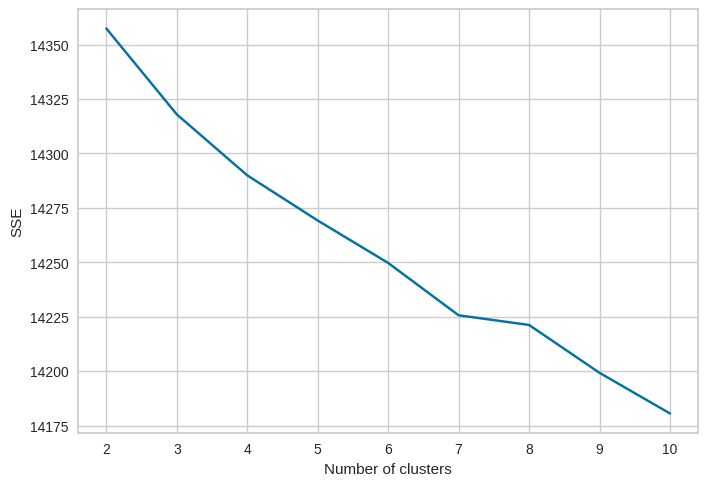

In [ ]:
# Choosing number of clusters using Elbow Method

sse = []
for k in range(2,11):
  kmeans = KMeans(n_clusters=k,init="k-means++",max_iter=100,n_init=1,random_state=42)
  kmeans.fit(X_pos)
  sse.append(kmeans.inertia_)

plt.plot(range(2,11),sse)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
# we see a slight bend at 3

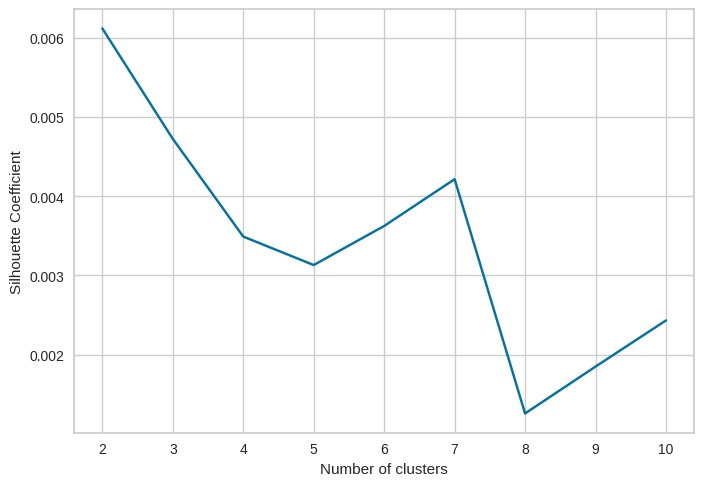

In [ ]:
# Choosing number of clusters using Silhouette Coefficient

silhouette_coefficients = []
for k in range(2,11):
  kmeans = KMeans(n_clusters=k,init="k-means++",max_iter=100,n_init=1,random_state=42)
  kmeans.fit(X_pos)
  score = silhouette_score(X_pos,kmeans.labels_)
  silhouette_coefficients.append(score)

plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()


In [ ]:
# Using 2 as number of clusters

num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters,init="k-means++",max_iter=100,n_init=1,random_state=42)
kmeans.fit(X_pos)

KMeans(max_iter=100, n_clusters=2, n_init=1, random_state=42)

In [ ]:
# Evaluate the performance of the clustering using adjusted Rand index
from sklearn.metrics import adjusted_rand_score

y_true = df_pos['Rating'].values
y_pred = kmeans.labels_
print('Adjusted Rand Index:',adjusted_rand_score(y_true,y_pred))

Adjusted Rand Index: 0.01075908839241966


In [ ]:
# Reduce the dimensionality of the vectors to 2 using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_pos.toarray())

In [ ]:
centroids = kmeans.cluster_centers_.argsort()[:,::-1]
centroids

array([[19442, 33027, 17835, ...,  8792,  8789, 19403],
       [32299,  5184, 16103, ..., 23209, 23210, 21626]])

In [ ]:
centroids.shape

(2, 43254)

In [ ]:
terms = tfidf.get_feature_names_out()
len(terms)

43254

In [ ]:
# Print the top terms per cluster
centroids = kmeans.cluster_centers_.argsort()[:,::-1]
terms = tfidf.get_feature_names_out()

for i in range(num_clusters):
  print(f"Cluster {i+1} top terms:",[terms[idx] for idx in centroids[i,:10]])

Cluster 1 top terms: ['hotel', 'room', 'great', 'location', 'stay', 'staff', 'good', 'nice', 'rooms', 'breakfast']
Cluster 2 top terms: ['resort', 'beach', 'food', 'pool', 'great', 'did', 'time', 'good', 'people', 'just']


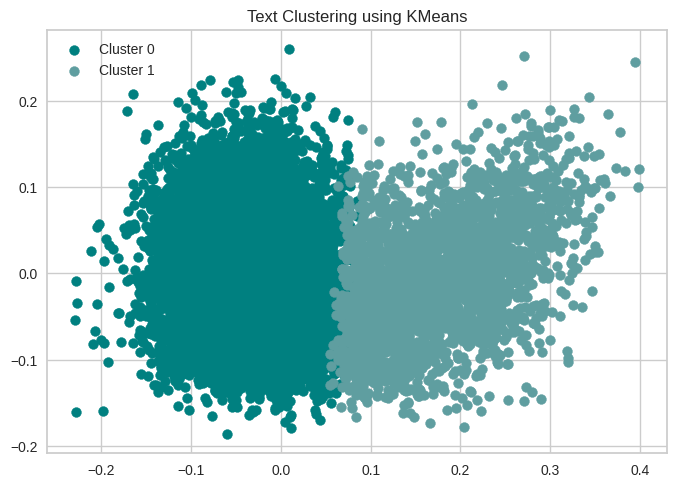

In [ ]:
# Plot clusters

colors = ['teal','cadetblue']
for i in range(num_clusters):
  plt.scatter(X_pca[kmeans.labels_ ==i,0],X_pca[kmeans.labels_ ==i,1],
              s = 50,
              c = colors[i],
              label = 'Cluster {}'.format(i))

plt.legend()
plt.title('Text Clustering using KMeans')
plt.show()

In [ ]:
# Get the most frequent words in each cluster

from wordcloud import WordCloud

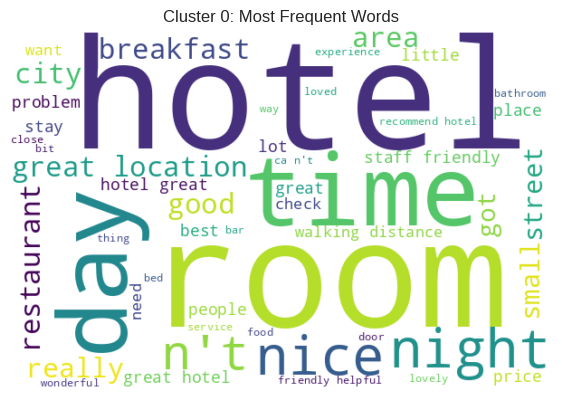

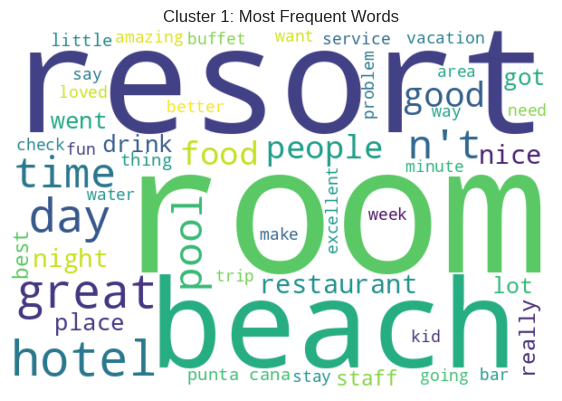

In [ ]:
top_words=50
for i in range(num_clusters):
  cluster_reviews = df_pos['Review'][kmeans.labels_ == i]
  cluster_text = ' '.join(cluster_reviews)
  wordcloud = WordCloud(width = 600,
                        height=400,
                        max_words = top_words,
                        background_color='white').generate(cluster_text)
  plt.figure(figsize=(7,7))
  plt.imshow(wordcloud,interpolation='bilinear')
  plt.axis('off')
  plt.title('Cluster {}: Most Frequent Words'.format(i))
  plt.show()

Negative Reviews

In [ ]:
# Load data

df = pd.read_csv("/content/drive/MyDrive/tripadvisor_hotel_reviews.csv")
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
# Choose negative reviews

df_neg = df[df['Rating']<=2]
df_neg.head()

,Review,Rating
1,ok nothing special charge diamond member hilto...,2
10,"poor value stayed monaco seattle july, nice ho...",2
15,horrible customer service hotel stay february ...,1
16,disappointed say anticipating stay hotel monac...,2
24,great location need internally upgrade advanta...,2


In [ ]:
# Convert text to numerical vectors with Tfidf for negative reviews

tfidf = TfidfVectorizer(stop_words="english")
X_neg = tfidf.fit_transform(df_neg['Review'])

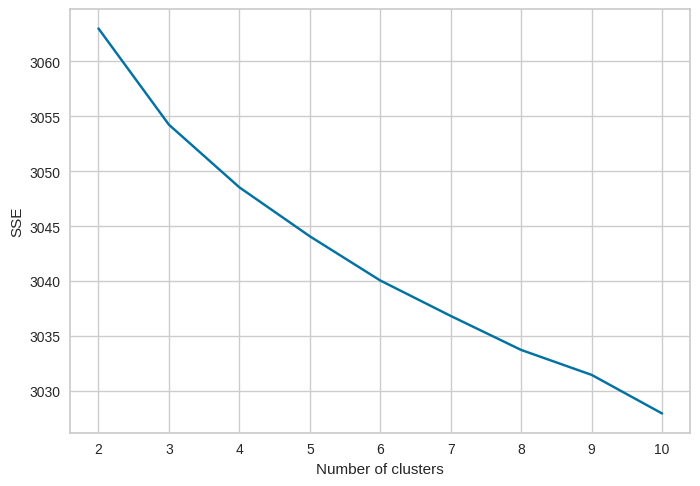

In [ ]:
# Choosing number of clusters using Elbow Method

sse = []
for k in range(2,11):
  kmeans = KMeans(n_clusters=k,init="k-means++",max_iter=100,n_init=1,random_state=42)
  kmeans.fit(X_neg)
  sse.append(kmeans.inertia_)

plt.plot(range(2,11),sse)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

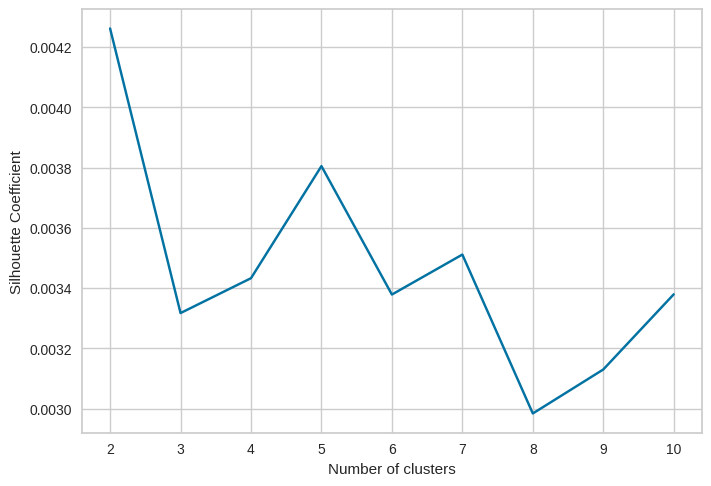

In [ ]:
# Choosing number of clusters using Silhouette Coefficient

silhouette_coefficients = []
for k in range(2,11):
  kmeans = KMeans(n_clusters=k,init="k-means++",max_iter=100,n_init=1,random_state=42)
  kmeans.fit(X_neg)
  score = silhouette_score(X_neg,kmeans.labels_)
  silhouette_coefficients.append(score)

plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()


In [ ]:
# Using 2 as number of clusters

num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters,init="k-means++",max_iter=100,n_init=1,random_state=42)
kmeans.fit(X_neg)

KMeans(max_iter=100, n_clusters=2, n_init=1, random_state=42)

In [ ]:
# Evaluate the performance of the clustering using adjusted Rand index
from sklearn.metrics import adjusted_rand_score

y_true = df_neg['Rating'].values
y_pred = kmeans.labels_
print('Adjusted Rand Index:',adjusted_rand_score(y_true,y_pred))

Adjusted Rand Index: -0.004007089544777602


In [ ]:
# Reduce the dimensionality of the vectors to 2 using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_neg.toarray())

In [ ]:
# Print the top terms per cluster
centroids = kmeans.cluster_centers_.argsort()[:,::-1]
terms = tfidf.get_feature_names_out()

for i in range(num_clusters):
  print(f"Cluster {i+1} top terms:",[terms[idx] for idx in centroids[i,:10]])

Cluster 1 top terms: ['hotel', 'room', 'stay', 'rooms', 'staff', 'night', 'did', 'good', 'location', 'stayed']
Cluster 2 top terms: ['resort', 'food', 'beach', 'room', 'did', 'day', 'service', 'pool', 'just', 'good']


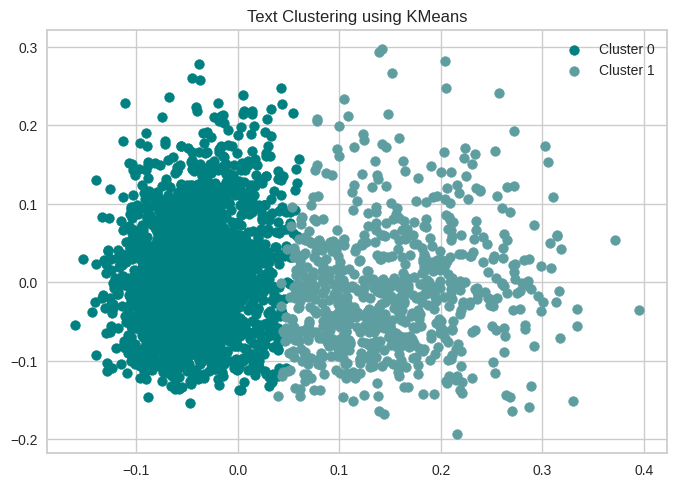

In [ ]:
# Plot clusters

colors = ['teal','cadetblue']
for i in range(num_clusters):
  plt.scatter(X_pca[kmeans.labels_ ==i,0],X_pca[kmeans.labels_ ==i,1],
              s = 50,
              c = colors[i],
              label = 'Cluster {}'.format(i))

plt.legend()
plt.title('Text Clustering using KMeans')
plt.show()

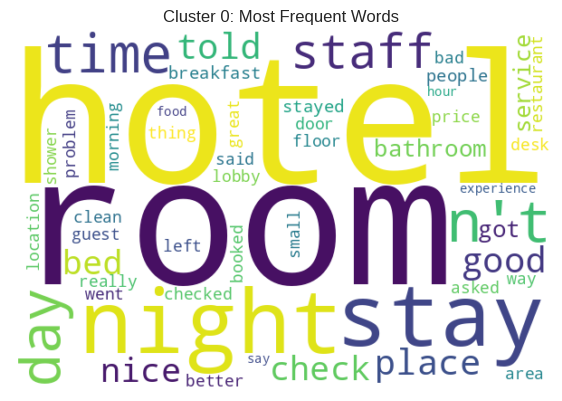

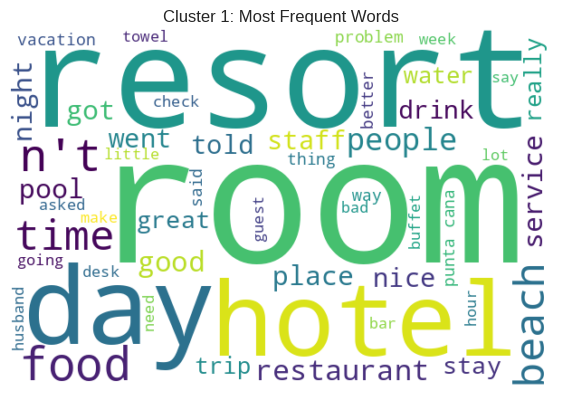

In [ ]:
top_words=50
for i in range(num_clusters):
  cluster_reviews = df_neg['Review'][kmeans.labels_ == i]
  cluster_text = ' '.join(cluster_reviews)
  wordcloud = WordCloud(width = 600,
                        height=400,
                        max_words = top_words,
                        background_color='white').generate(cluster_text)
  plt.figure(figsize=(7,7))
  plt.imshow(wordcloud,interpolation='bilinear')
  plt.axis('off')
  plt.title('Cluster {}: Most Frequent Words'.format(i))
  plt.show()